In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as fft
from scipy.signal import welch

from lpc.utils import *
from examples.utils import butter_lowpass_filter

We first record some 3 seconds Polish 'sz' consonant.
We then lowpass-filter this signal with cutoff frequency of 4kHz, 
because that's (I think?) what standard speech coding systems use. 

Then we plot obtained signal in both time and frequency domains.
Same procedure is used to record other sounds as well. 

In [28]:
audio_dir = os.path.join('.', '..', 'audio')
fs = 44100

sz_path = os.path.join(audio_dir, 'sz.wav')
if not os.path.exists(sz_path):
    audio = record_audio(3, sample_rate=fs)
    dump_audio(audio, sz_path)
else:
    audio = get_audio(sz_path)

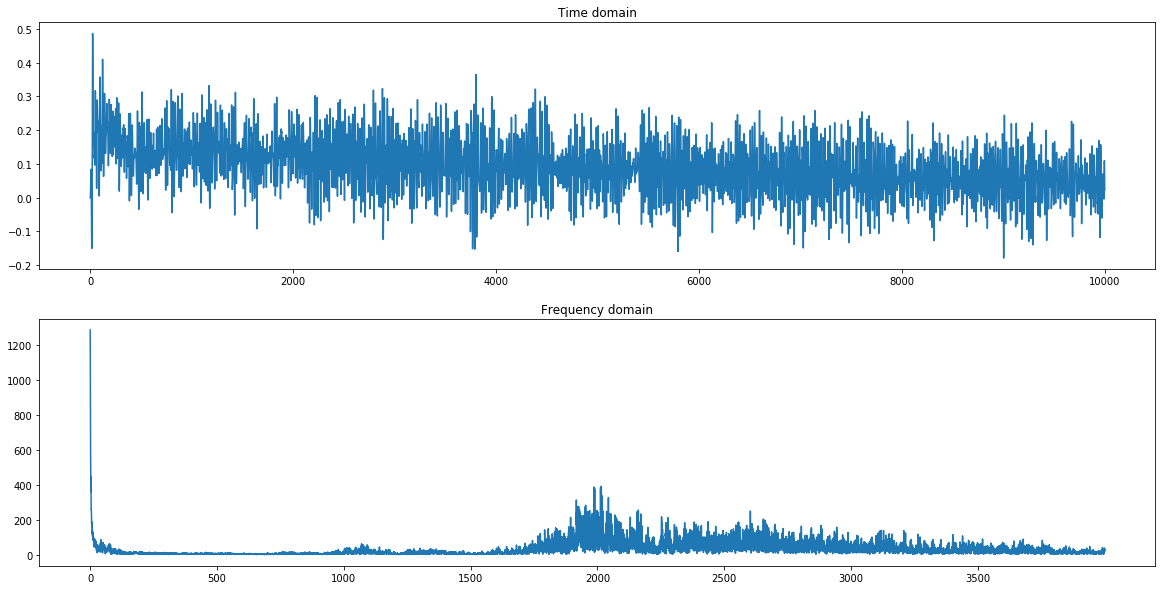

In [29]:
left, right = audio[:, 0], audio[:, 1]
f_step, f_min, f_max = 500, 0, 4000

cutoff_freq = f_max
left_lp = butter_lowpass_filter(left, cutoff_freq, sample_rate=fs)

def plot_audio(data, t_samples=10000, fs=fs):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

    # Find samples that determine frequency interval of interest.
    N = len(data)
    k_0, k_max = f_min * N / fs, f_max * N / fs  
    k_step = f_step * N / fs  
    
    amp_freq_response = np.abs(fft.rfft(data))
    ax2.plot(amp_freq_response[:int(k_max)])
    ax2.set_title('Frequency domain')
    
    xticks = np.arange(k_0, k_max, k_step)
    xtick_labels = map(str, np.arange(f_min, f_max, f_step))
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xtick_labels)
    
    ax1.plot(data[:t_samples])
    ax1.set_title('Time domain')
    
plot_audio(left_lp)

Let's also try out Welch power spectral density estimate which
should be less noisy.

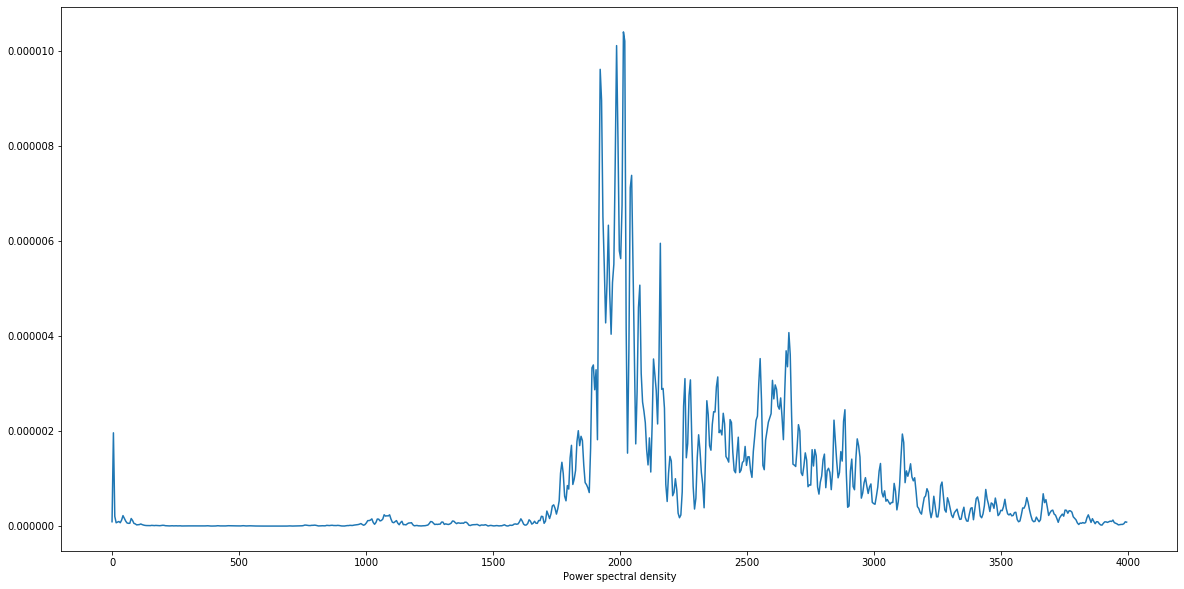

In [30]:
def plot_welch(data, sample_rate=fs):
    plt.figure(figsize=(20, 10))
    f, Pxx_den = welch(data, fs=sample_rate, nperseg=8192)
    welch_min = int(2 * f_min / fs * len(f))
    welch_max = int(2 * f_max / fs * len(f))
    plt.plot(f[welch_min:welch_max], Pxx_den[welch_min:welch_max])
    plt.xlabel('Power spectral density')
    

plot_welch(left_lp)

Niiice. 'sz' is an unvoiced consonant and the spectrum looks like it.
We can see noisiness of the characteristic on higher frequencies.